## Question 1

#### Data

From the data we can calculate the probabilities for the target values

| Taste | Farm Climate | Visual Defects | Size |
| --- | --- | --- | --- |
| Meh | Warm | Some | Small |
| Meh | Cold | None | Large |
| Meh | Cold | None | Large |
| Yummy | Cold | Many | Small |
| Yummy | Warm | Many | Small |
| Meh | Warm | Some | Large | 
| Yummy | Warm | Many | Large |
| Yummy | Cold | None | Small |
| Yummy | Cold | None | Small |
| Meh | Warm | Some | Large |

The probabilities are 
$$P(Y=Meh) = \frac{5}{10} = \frac{1}{2},$$
and 
$$P(Y=Yummy) = \frac{5}{10} = \frac{1}{2}.$$

Hence, the initial entropy is 
$$H(Y) = -\left( P(Y=Meh)\log_{2}P(Y=Meh) + P(Y=Yummy)\log_{2}P(Y=Yummy) \right) $$


In [3]:
import math

H_ini = -(1/2 * math.log2(1/2) + 1/2 * math.log2(1/2))
print("H(Y) = ", H_ini)

H(Y) =  1.0


## Question 2

We need to calculate the conditional probabilities. First, let's sort the "Visual Defects" column according the the three values "None", "Some, and "Many".

|Visual defect | P(Y=Meh) | P(Y=Yummy) |
| --- | --- | --- |
| None | 2/4 | 2/4 |
| Some | 3/3 | 0/3 |
| Many | 0/3 | 3/3 |

We need to calculate the conditional entropy first. This is given by
$$ H(Y|X) = -\left(P(X=None)\left( P(Y=Meh|X=None)\log_{2}P(Y=Meh|X=None) + P(Y=Yummy|X=None)\log_{2}P(Y=Yummy|X=None) \right) + P(X=Some)\left( P(Y=Meh|X=Some)\log_{2}P(Y=Meh|X=Some) + P(Y=Yummy|X=Some)\log_{2}P(Y=Yummy|X=Some) \right) + P(X=Many)\left( P(Y=Meh|X=Many)\log_{2}P(Y=Meh|X=Many) + P(Y=Yummy|X=Many)\log_{2}P(Y=Yummy|X=Many) \right) \right)$$

We also need the probabilities $P(X=x_{i})$. These are $P(Visual Defects=None) = \frac{4}{10}$, $P(Visual Defects=Some) = \frac{3}{10}$, and $P(Visual Defects=Many) = \frac{3}{10}$. 

The information gain is then given by 
$$IG(X) = H(Y) - H(Y|X)$$


In [6]:
H_cond = -(4/10 * (2/4 * math.log2(2/4) + 2/4 * math.log2(2/4)) + 3/10 *(3/3 * math.log2(3/3)) + 3/10 *(3/3 * math.log2(3/3)))
print("H(Y|Visual Defects) =",H_cond)
IG = H_ini - H_cond
print("IG(Y|Visual Defects) = ",IG)

H(Y|Visual Defects) = 0.4
IG(Y|Visual Defects) =  0.6


## Question 3

The conditional entropies are
$$ H(Y|X = Some) = -\left(P(X=Some)\left( P(Y=Meh|X=Some)\log_{2}P(Y=Meh|X=Some) + P(Y=Yummy|X=Some)\log_{2}P(Y=Yummy|X=Some) \right) \right)$$ 
and We need to calculate the conditional entropy first. This is given by
$$ H(Y|X = None) = -\left(P(X=None)\left( P(Y=Meh|X=None)\log_{2}P(Y=Meh|X=None) + P(Y=Yummy|X=None)\log_{2}P(Y=Yummy|X=None) \right) \right)$$

In [16]:
H_cond_some = -(4/10 * (2/4 * math.log2(2/4) + 2/4 * math.log2(2/4)))
print("H(Taste|Visual Defect = Some) = ", H_cond_some)

H_cond_none = -(3/10 *(3/3 * math.log2(3/3)))
print("H(Taste|Visual Defect = None) = ", H_cond_none)

H(Taste|Visual Defect = Some) =  0.4
H(Taste|Visual Defect = None) =  -0.0


## Question 4

In [192]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# To use only with Colab
from google.colab import drive
drive.mount("/content/drive")

(128, 128, 3)


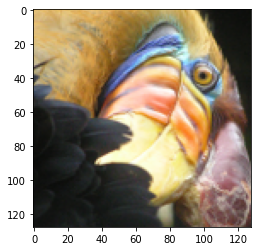

In [193]:
#loading and normalise the image
#img = cv2.imread("content/drive/MyDrive/input.png")/255
img = cv2.imread("/content/drive/MyDrive/input.png")/255 #For Colab
img = img.astype(np.float32)

print(np.shape(img))

#to preserve the original color, we have to load the image in RGB sincwe by default OpenCV loads it in BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#rescaling the image to reduce the data size and speed up ther algorithm
scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)  
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

#resized image
plt.imshow(img)

In [194]:
#convert the 128x128x3 image to a Kx3 image where K = 128x128
vectorised = img.reshape((-1,3))

#Convert the array to a dataframe
img_df = pd.DataFrame(vectorised)
img_df.rename(columns={0:'R', 1:'G', 2: 'B'}, inplace =True)

In [200]:
def get_random_centroids(data, k):
    #select k random points to intialize the centroids
    cent = (data.sample(n = k))
    return cent

def k_means_fit(X,centroids, n=k):
    #get a copy of the original data
    X_data = X
    diff = 1
    j=0

    #Stop the algorithm after centroids are update by epsilon < 0.05
    while(abs(diff)>0.05):
        i=1
        #iterate over each centroid point
        for index1,row_c in centroids.iterrows():
            ED=[]

            #iterate over each data point
            for index2,row_d in X_data.iterrows():

                #calculate distance between current point and centroid
                d1=(row_c["R"]-row_d["R"])**2
                d2=(row_c["G"]-row_d["G"])**2
                d3=(row_c["B"]-row_d["B"])**2
                d=np.sqrt(d1+d2+d3)

                #append distance in a list 'ED'
                ED.append(d)

            #append distace for a centroid in original data frame
            X[i]=ED
            i=i+1

        C=[]
        for index,row in X.iterrows():

            #get distance from centroid of current data point
            min_dist=row[1]
            pos=1

            #loop to locate the closest centroid to current point
            for i in range(n):

                #if current distance is greater than that of other centroids
                if row[i+1] < min_dist:

                    #the smaller distanc becomes the minimum distance 
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos)

        #assigning the closest cluster to each data point
        X["Cluster"]=C

        #grouping each cluster by their mean value to create new centroids
        centroids_new = X.groupby(["Cluster"]).mean()[["R","G","B"]]
        if j == 0:
            diff=1
            j=j+1

        else:
            #check if there is a difference between old and new centroids
            diff = (centroids_new['R'] - centroids['R']).sum() + (centroids_new['G'] - centroids['G']).sum() + (centroids_new['B'] - centroids['B']).sum()
            print("Difference between new and old centroids:",diff.sum())

        centroids = X.groupby(["Cluster"]).mean()[["R","G","B"]]
        
    return X, centroids


In [201]:
#Run algorithm with k centroids
k = 10
centroids = get_random_centroids(img_df, k)
clustered, cent = k_means_fit(img_df,centroids, n= k)

Difference between new and old centroids: 0.37029076
Difference between new and old centroids: 0.2218321
Difference between new and old centroids: 0.20270914
Difference between new and old centroids: 0.19117036
Difference between new and old centroids: 0.16667835
Difference between new and old centroids: 0.13839653
Difference between new and old centroids: 0.11508471
Difference between new and old centroids: 0.099472545
Difference between new and old centroids: 0.10068354
Difference between new and old centroids: 0.09120795
Difference between new and old centroids: 0.08702382
Difference between new and old centroids: 0.078571394
Difference between new and old centroids: 0.05798833
Difference between new and old centroids: 0.047849283


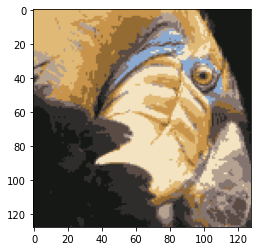

In [202]:
#Convert back to numpy arrays
cent = cent.to_numpy()
labels = clustered['Cluster'].to_numpy()

#overwritting the pixels values
segmented_image = cent[labels-1]
segmented_image = segmented_image.reshape(img.shape)

#plotting the image
plt.imshow(segmented_image)

In [204]:
cv2.imwrite("new_input.png", segmented_image)

True